# 3. Análise Exploratória dos Dados

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('../dataset/dados_tratados.csv')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,order_status_approved,order_status_canceled,order_status_created,order_status_delivered,order_status_invoiced,order_status_processing,order_status_shipped,order_status_unavailable
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,-0.428624,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,0.094843,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,-0.323930,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,0.094843,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,-1.056785,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


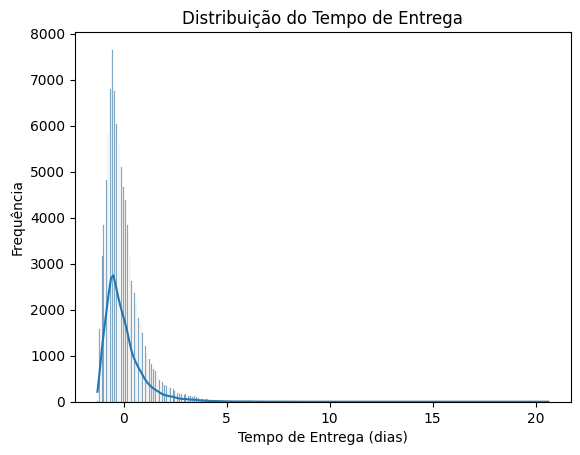

In [18]:
sns.histplot(df['delivery_time'], kde=True)
plt.title('Distribuição do Tempo de Entrega')
plt.xlabel('Tempo de Entrega (dias)')
plt.ylabel('Frequência')
plt.show()

In [19]:
df['delivery_time'].describe()

count    9.647600e+04
mean     8.679616e-17
std      1.000005e+00
min     -1.266171e+00
25%     -6.380108e-01
50%     -2.192370e-01
75%      3.042302e-01
max      2.061476e+01
Name: delivery_time, dtype: float64

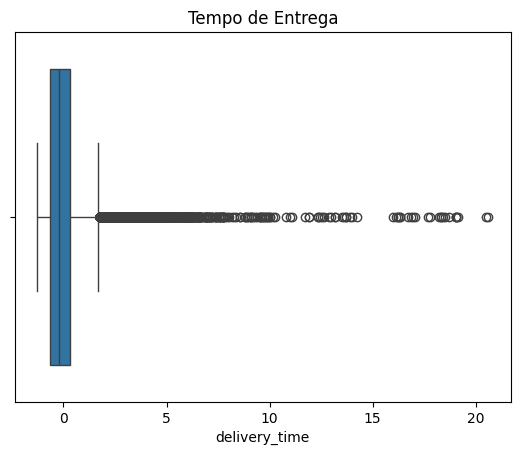

In [20]:
# outliers
sns.boxplot(x=df['delivery_time'])
plt.title('Tempo de Entrega')
plt.show()

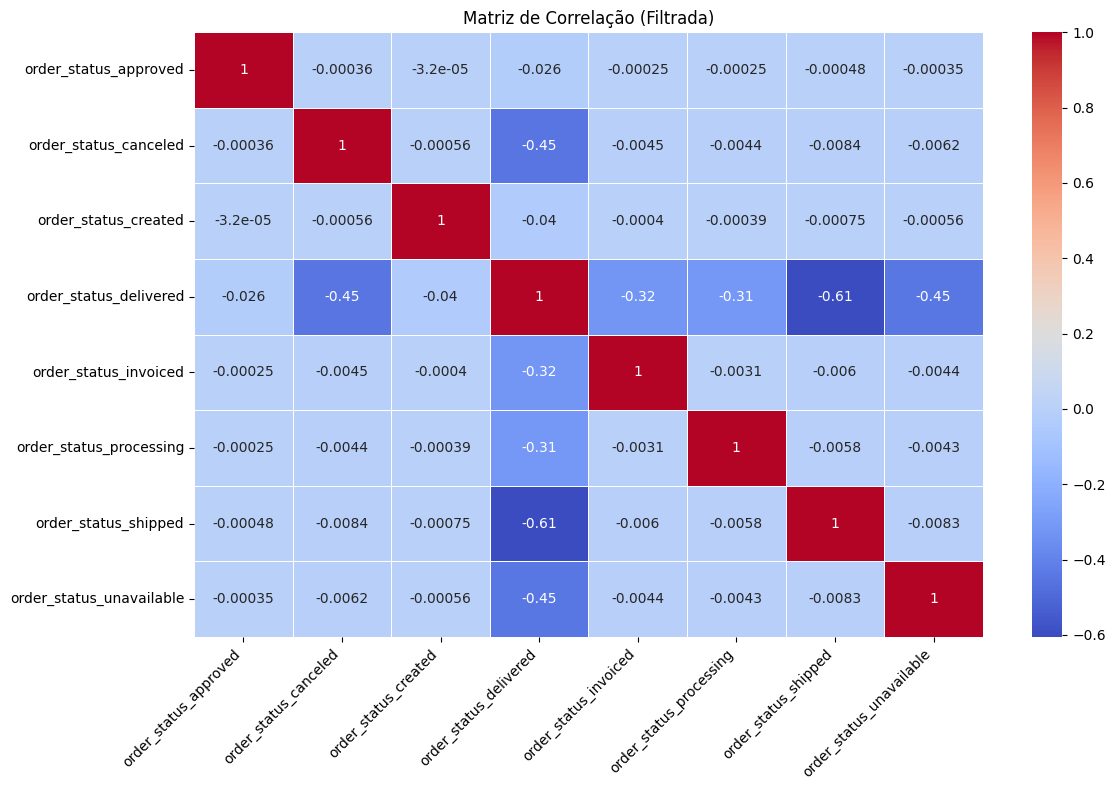

In [21]:
# Caso alguem queira entender o q ta havendo... eu to removendo os NaN q da na tabela por algum tratamento mal feito q eu fiz
# e to removendo o delivery time... esse campo maldito ta fazendo a matriz de correlacao ficar horrivelmente feia
correlation_matrix = df.select_dtypes(include='number').corr().dropna(axis=0, how='all').dropna(axis=1, how='all').drop('delivery_time', axis=0).drop('delivery_time', axis=1)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação (Filtrada)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()